Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a 
                unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains 
                    transaction _csvto customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

First step is to list files we have and check data quality for each file.
This steps is good for getting know the data and understanding what each column represents


In [1347]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Cab_Data.csv',
 'City.csv',
 'Customer_ID.csv',
 'EDA.ipynb',
 'exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf',
 'README.md',
 'Transaction_ID.csv',
 'US Holiday Dates (2004-2021).csv']

First file I'm checking is cab data csv file.
I want to see how the data looks like, check data types, see if there are duplicates or outliers.

In [1348]:
cab_data_df = pd.read_csv('Cab_Data.csv')
cab_data_df.head()



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.450,370.950,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.620,358.520,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.040,125.200,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.170,377.400,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.730,114.620,97.776


In [1349]:
cab_data_df.shape

(359392, 7)

The Date of Travel column is not in the right format, so I have to chage it 

In [1350]:
cab_data_df['Date of Travel'] = pd.TimedeltaIndex(cab_data_df['Date of Travel'], unit='d') + dt.datetime(1899, 12, 30)
cab_data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776


Now I want to see if the column data types are ok

In [1351]:
cab_data_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

We can see that Transaction Id column is int data type. This can be a discussion for itself. I usually like to keep ID columns as objects. This is becase we are not supposed to do any numerical operations on them. This is why i'm changing the column type to object

In [1352]:
cab_data_df['Transaction ID'] = cab_data_df['Transaction ID'].apply(str)
cab_data_df.dtypes

Transaction ID            object
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

The next step is checking duplicates and na and null values. Primary key is Transaction ID

In [1353]:
print('Number of na values: ',cab_data_df.isna().sum().sum()) #check for na values
print('Number of null values: ',cab_data_df.isnull().sum().sum()) #check for na values
print('Number of rows in a dataset: ',cab_data_df.shape[0],'\nNumber of unique Transaction ID values: ', cab_data_df['Transaction ID'].nunique()) #

Number of na values:  0
Number of null values:  0
Number of rows in a dataset:  359392 
Number of unique Transaction ID values:  359392


There are no na values and no duplicates. The next step is to use describe function to see some basic statistics for the data. This is the step where we can see if any values have a wrong input (like negative number of kilometers or negative price etc)

In [1354]:
cab_data_df.describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000,359392.000,359392.000
mean,22.567,423.443,286.190
std,12.234,274.379,157.994
min,1.900,15.600,19.000
25%,12.000,206.438,151.200
50%,22.440,386.360,282.480
75%,32.960,583.660,413.683
max,48.000,2048.030,691.200


Everything looks good so far. I'm contiuning to drawing boxplots

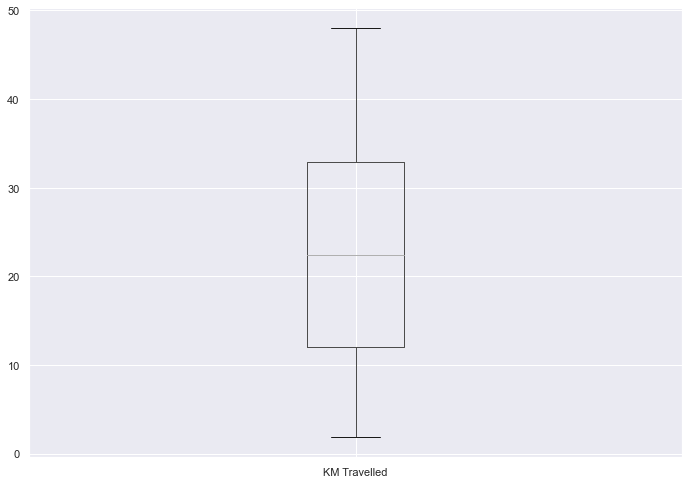

In [1355]:
boxplot = cab_data_df.boxplot(column='KM Travelled')  


Boxplot for KM Travelled looks good, no outliers detected

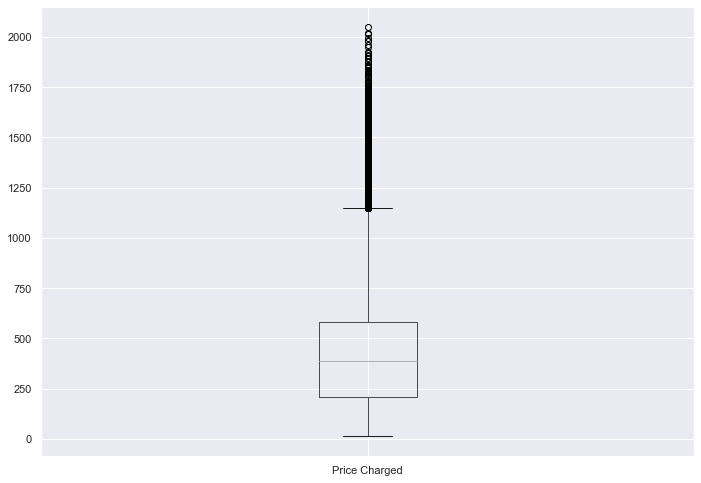

In [1356]:
boxplot = cab_data_df.boxplot(column= 'Price Charged')  


We might have outliers, but we have to do further data analysis. 
If the KM traveled for the outliers is high, than we won't take the outliers out.
I'm gonna draw a scetterplot to see why the price is so high

<AxesSubplot: xlabel='Price Charged', ylabel='KM Travelled'>

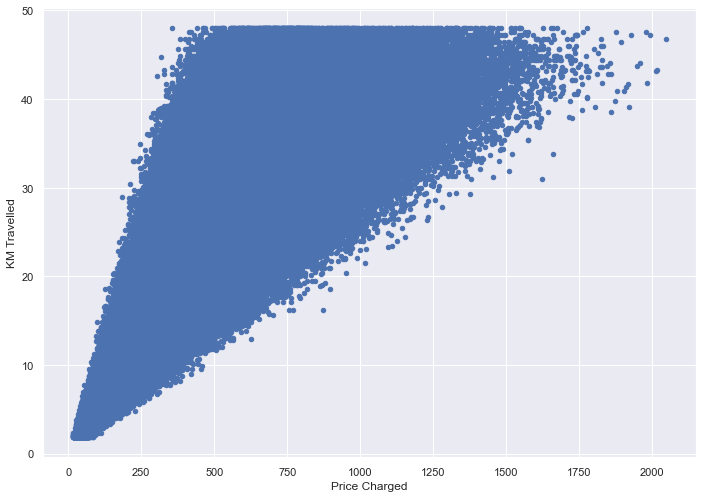

In [1357]:
cab_data_df.plot.scatter(x='Price Charged', y='KM Travelled')


No outliers detected, the price is high because of the lenght of the ride (number of kilometers driven)
There are some values that pop out a bit, but not much so I'm gonne assume that the data qulity is good so far.
Moving on to the next boxplot

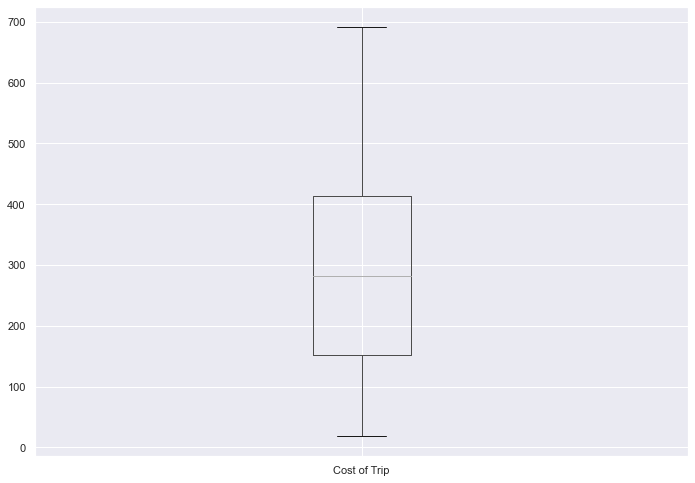

In [1358]:
boxplot = cab_data_df.boxplot(column= 'Cost of Trip')  


The above boxplot looks good, there are no outliers. 
I want to check min and max date values and unique values of company column, just to see if everything is ok

In [1359]:
print('Min date: ',min(cab_data_df['Date of Travel']),'\nMax date: ',max(cab_data_df['Date of Travel']))

Min date:  2016-01-02 00:00:00 
Max date:  2018-12-31 00:00:00



I want to check the company column, to see if maybe some values are wrongly written

In [1360]:
cab_data_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

######################################################################################################

Moving on to the second dataset. I'm not gonna describe everything in detail like for the first dataset, only if I come across to something different.

In [1361]:
city_df = pd.read_csv('City.csv')
#after checking dataframe types, I realised the dataframe needs transformations
#I need to convert Population and users to integers
city_df['Population'] = city_df['Population'].str.replace(',','').str.replace(' ','').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',','').str.replace(' ','').astype(int)
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [1362]:
city_df.shape

(20, 3)

In [1363]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

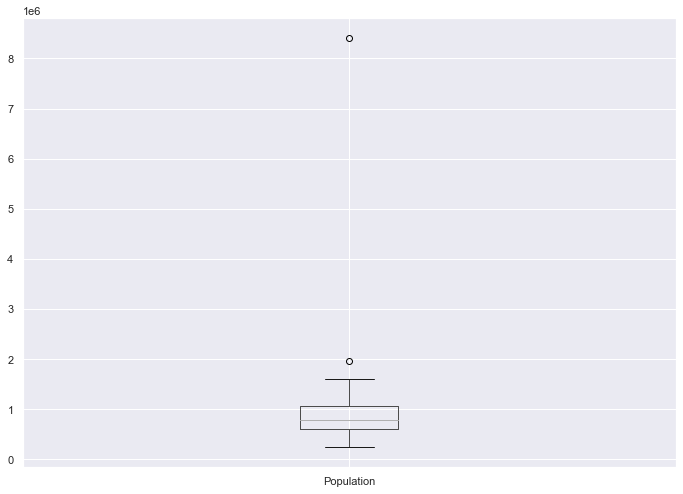

In [1364]:
boxplot = city_df.boxplot(column= 'Population')  

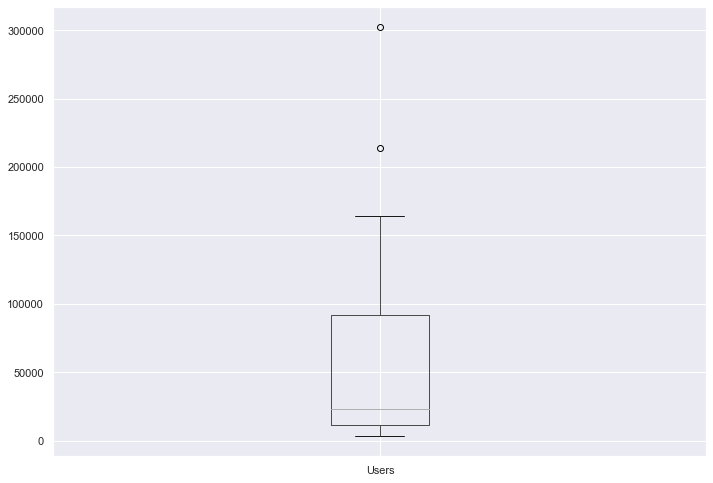

In [1365]:
boxplot = city_df.boxplot(column= 'Users')  

In [1366]:
#Checking na values and duplicates

print('Number of na values: ',city_df.isna().sum().sum()) #check for na values
print('Number of null values: ',city_df.isnull().sum().sum()) #check for null values
print('Number of rows in a dataset: ',city_df.shape[0],'\nNumber of unique City values: ', city_df['City'].nunique()) #City is primary key
#there are no duplicated values

Number of na values:  0
Number of null values:  0
Number of rows in a dataset:  20 
Number of unique City values:  20


In [1367]:
city_df.describe()

,Population,Users
count,20.000,20.000
mean,1231592.000,64520.650
std,1740126.700,83499.375
min,248968.000,3643.000
25%,608637.250,11633.250
50%,784559.000,23429.000
75%,1067041.000,91766.000
max,8405837.000,302149.000


##################################################################################################

Moving on to the third dataset

In [1368]:
customer_id_df = pd.read_csv('Customer_ID.csv')
customer_id_df['Customer ID'] =customer_id_df['Customer ID'].apply(str)
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [1369]:
customer_id_df.shape

(49171, 4)

In [1370]:
customer_id_df.dtypes

Customer ID           object
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [1371]:
print(customer_id_df.isna().sum().sum()) #check for na values
print(customer_id_df.isnull().sum().sum()) #check for null values
print(customer_id_df.shape[0], customer_id_df['Customer ID'].nunique()) #Customer ID is primary key
#there are no duplicated values

0
0
49171 49171


In [1372]:
customer_id_df.describe()

,Age,Income (USD/Month)
count,49171.000,49171.000
mean,35.363,15015.632
std,12.599,8002.208
min,18.000,2000.000
25%,25.000,8289.500
50%,33.000,14656.000
75%,42.000,21035.000
max,65.000,35000.000


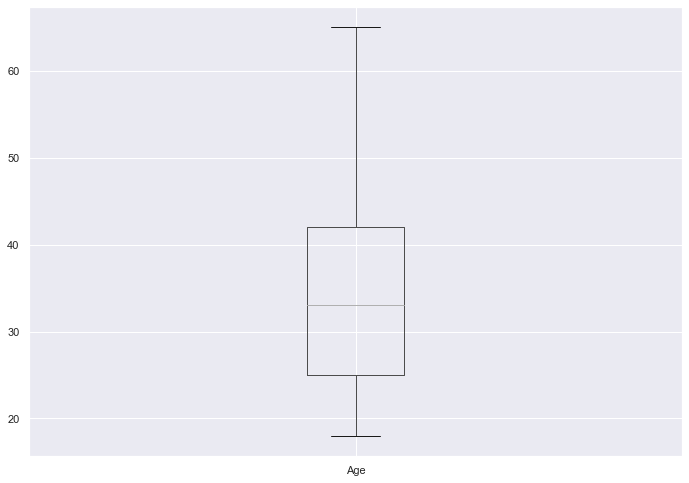

In [1373]:
boxplot = customer_id_df.boxplot(column= 'Age')  

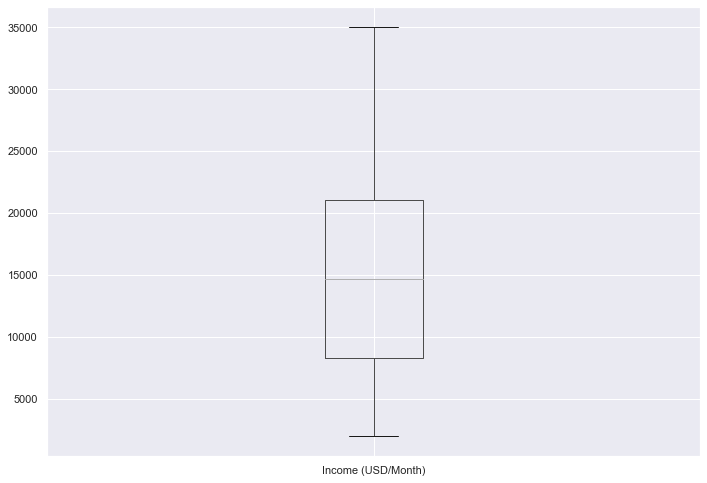

In [1374]:
boxplot = customer_id_df.boxplot(column= 'Income (USD/Month)')  

###############################################################################################################

Moving on to the 4th dataset

In [1375]:
transaction_id_df = pd.read_csv('Transaction_ID.csv')
transaction_id_df['Customer ID'] = transaction_id_df['Customer ID'].apply(str)
transaction_id_df['Transaction ID'] = transaction_id_df['Transaction ID'].apply(str)
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [1376]:
transaction_id_df.shape

(440098, 3)

In [1377]:
transaction_id_df.dtypes

Transaction ID    object
Customer ID       object
Payment_Mode      object
dtype: object

In [1378]:
print(transaction_id_df.isna().sum().sum()) #check for na values
print(transaction_id_df.isnull().sum().sum()) #check for null values
print(transaction_id_df.shape[0], transaction_id_df['Transaction ID'].nunique()) 
#Transaction ID is primary key
#there are no duplicated values

0
0
440098 440098


In [1379]:
transaction_id_df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

###############################################################################################################

###############################################################################################################

After checking data quality, I realised that there are some relationships between the datasets, so we are going to merge what we can into single dataset - master_df. 

So, we have 4 datasets and we are going to check each one of them one more time. Only first couple of rows so it's easier for me to explain everything.


In [1380]:
cab_data_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632


In [1381]:
city_df.head(3)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132


In [1382]:
customer_id_df.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [1383]:
transaction_id_df.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


We can say that the fact table is cab_data_df and other 3 tables are dimension tables. What we will do is to join each dimension table to the fact table.

First step is to join cab_data_df and city_df. We will join them on column City. Method is left join. AFter joining the data we will check for na values in the added columns which are Population and USers.


One thing to notice here is that we cannot do any mathematical operations on population and users unless we do goupping by city!!!!!!!!!!!!!!!

In [1384]:
master_df = cab_data_df.merge(city_df, on='City', how='left')
master_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701


In [1385]:
#no duplicates, everything is ok
print(cab_data_df.shape[0])
print(master_df.shape[0])

359392
359392


In [1386]:
print(master_df['Population'].isna().sum()) #check for na values
print(master_df['Users'].isna().sum()) #check for na values
print(master_df['Population'].isnull().sum()) #check for null values
print(master_df['Users'].isnull().sum()) #check for null values

0
0
0
0


master_df looks great for now. We will add to it the columns from transaction_id_df. The join will be left join on the column Customer ID

In [1387]:
master_df = master_df.merge(transaction_id_df, on='Transaction ID', how='left')
master_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,Card


In [1388]:
#no duplicates, everything is ok
print(cab_data_df.shape[0])
print(master_df.shape[0])

359392
359392


In [1389]:
print(master_df['Customer ID'].isna().sum()) #check for na values
print(master_df['Payment_Mode'].isna().sum()) #check for na values
print(master_df['Customer ID'].isnull().sum()) #check for null values
print(master_df['Payment_Mode'].isnull().sum()) #check for null values

0
0
0
0


Everything looks great again. We will add the third dataset, customer_id_df. The join is left join on column Customer ID.


Again, we have to be carefull when doing mathematical operations on column coming from dimension tables!


I also want to check if there are some transations in transaction_id_df that are not in the cab_data_df

In [1390]:
test = transaction_id_df.merge(cab_data_df, on ='Transaction ID', how ='left')
test[test['Date of Travel'].isnull()]

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
192,10000203,43177,Card,NaT,NaN,NaN,NaN,NaN,NaN
193,10000204,44348,Cash,NaT,NaN,NaN,NaN,NaN,NaN
194,10000205,44599,Cash,NaT,NaN,NaN,NaN,NaN,NaN
195,10000206,44264,Cash,NaT,NaN,NaN,NaN,NaN,NaN
196,10000207,43369,Cash,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
440067,10440078,51612,Cash,NaT,NaN,NaN,NaN,NaN,NaN
440080,10440091,53963,Card,NaT,NaN,NaN,NaN,NaN,NaN
440091,10440102,52526,Cash,NaT,NaN,NaN,NaN,NaN,NaN
440092,10440103,53171,Card,NaT,NaN,NaN,NaN,NaN,NaN


Yep, there are... But since transaction_id_df table doesn't have any additional data about that tramsaction (like for which company it is), we cannot do any cab data analysis on it, so I'm goint to ignote this unmapped values and continue the analysis with the complete data.

In [1391]:
master_df = master_df.merge(customer_id_df, on='Customer ID', how='left')
master_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,Card,Male,33,8536


In [1392]:
#no duplicates, everything is ok
print(cab_data_df.shape[0])
print(master_df.shape[0])

359392
359392


In [1393]:
print(master_df['Gender'].isna().sum()) #check for na values
print(master_df['Age'].isna().sum()) #check for na values
print(master_df['Income (USD/Month)'].isna().sum()) #check for na values
print(master_df['Gender'].isnull().sum()) #check for null values
print(master_df['Age'].isnull().sum()) #check for null values
print(master_df['Income (USD/Month)'].isnull().sum()) #check for null values

0
0
0
0
0
0


Now all 4 datasets are in a single dataset calles master_df. This is the datase I am going to use for the analysis and modeling predictions. Before that, there are some things I want to add/change to the dataset. One thing are cathegorical variables and additional columns, the other thing are third sources, something we don't have in the dataset so far, the third are the column renamings.

I'm gonna start with column renaming. It is not necessary and I usually do it at the start of the anaylsis. While working on this notebook my first thought was not to go into to much detail, but I just don't like the uppercase, so I'm going to change the column names now :D 

In [1394]:
import re

cols = master_df.columns.str.replace(r'[^A-Za-z _]', ' ', regex=True).str.replace(r'  ', ' ', regex=True)
master_df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col.rstrip().replace(' ','_').lower()) for col in cols]
master_df.head(5)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,income_usd_month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,Card,Male,33,8536


Since the column names are ok now, we will move to the categorical variables and additional columns
A categorical variable is variable that has two or more categories, but there is no intrinsic ordering to the categories. We already have some of those in our columns: City, Gender, Payment_Mode

I want to add more categorical columns. I want to add age gourp column and income group column for now.
Age groups would be the ones I used mostly at work: <18, 18-25, 26-40, 41-62, 63+
Income groups will be created after I see min and amx values, but I assume that the groups will be separated by 10000k of earnings increase.

In [1395]:
def age_group (row):
    if row['age'] < 18 :
      return '<18'
    if row['age']>= 18 and  row['age']<= 25:
      return '18-25'
    if row['age']>= 26 and  row['age']<= 40:
      return '26-40'
    if row['age']>= 41 and  row['age']<= 62:
      return '41-65'
    if row['age']>= 63 :
      return '63+'
    return 'Other'
master_df['age_group'] = master_df.apply (lambda row: age_group(row), axis=1)

In [1396]:
master_df.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,income_usd_month,age_group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,Card,Male,28,10813,26-40
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,Card,Male,27,9237,26-40
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,Cash,Male,53,11242,41-65
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,Cash,Male,23,23327,18-25
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,Card,Male,33,8536,26-40


In [1397]:
print(min(master_df['income_usd_month']),max(master_df['income_usd_month']))

2000 35000


In [1398]:
def income_group (row):
    if row['income_usd_month'] < 2000 :
      return '<2000'
    if row['income_usd_month']>= 2000 and  row['income_usd_month']<= 9999:
      return '2000-9999'
    if row['income_usd_month']>= 10000 and  row['income_usd_month']<= 19999:
      return '10000-19999'
    if row['income_usd_month']>= 20000 and  row['income_usd_month']<= 29999:
      return '20000-29999'
    if row['income_usd_month']>= 30000 :
      return '30k+'
    return 'Other'
master_df['income_group'] = master_df.apply (lambda row: income_group(row), axis=1)

In [1399]:
master_df.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,income_usd_month,age_group,income_group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,Card,Male,28,10813,26-40,10000-19999
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,Card,Male,27,9237,26-40,2000-9999
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,Cash,Male,53,11242,41-65,10000-19999
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,Cash,Male,23,23327,18-25,20000-29999
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,Card,Male,33,8536,26-40,2000-9999


One more column I'm adding is the profit. 
We have price_charged and cost_of_trip columns, so profit would be price_charged-cost_of_trip

In [1400]:
master_df['profit'] = master_df['price_charged'] - master_df['cost_of_trip']

In [1401]:
master_df.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,income_usd_month,age_group,income_group,profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,Card,Male,28,10813,26-40,10000-19999,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,Card,Male,27,9237,26-40,2000-9999,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,Cash,Male,53,11242,41-65,10000-19999,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,Cash,Male,23,23327,18-25,20000-29999,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,Card,Male,33,8536,26-40,2000-9999,16.844


Now I want to include some third party datasets. 
First thing that popped into my mind was weather, because I know that weather really impacts the price. In my country, when it's raining, the prices are higher up to 300. It's because during bad wether market demand is much higher because nobody wants to use public transport. But I couldn't find any good apis that I could use. Most of the good ones are not free.

The second thing that I thought of are holidays. I actually found kaggle dataset and I'm gonna use it. The link is:
https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021?resource=download
I'm gonna check the column types (probably need to change date format) and add column is_holiday = Yes

In [1402]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Cab_Data.csv',
 'City.csv',
 'Customer_ID.csv',
 'EDA.ipynb',
 'exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf',
 'README.md',
 'Transaction_ID.csv',
 'US Holiday Dates (2004-2021).csv']

In [1403]:
holidays_df = pd.read_csv( 'US Holiday Dates (2004-2021).csv')
holidays_df.columns = [col.lower() for col in holidays_df.columns]
holidays_df['is_holiday'] = 'Yes'
holidays_df = holidays_df[['date','is_holiday']].drop_duplicates()
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

In [1404]:
holidays_df.dtypes

date          datetime64[ns]
is_holiday            object
dtype: object

In [1405]:
master_df = master_df.merge(holidays_df,  left_on='date_of_travel', right_on='date', how='left')

In [1406]:
master_df.drop('date', axis = 1,inplace = True)

In [1407]:
master_df['is_holiday'] = master_df['is_holiday'].fillna(value='No')

I also want to add columns: year, quarter, month and weekday. 
They might come in handy later

In [1408]:
master_df['year'] = master_df['date_of_travel'].dt.year.astype(str)
master_df['quarter'] = master_df['date_of_travel'].dt.quarter.astype(str)
master_df['month'] = master_df['date_of_travel'].dt.month.astype(str)
master_df['weekday'] = master_df['date_of_travel'].dt.day_name()
master_df['week'] = master_df['date_of_travel'].dt.isocalendar().week.astype(str)

In [1409]:
master_df.head(5)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,...,income_usd_month,age_group,income_group,profit,is_holiday,year,quarter,month,weekday,week
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,29290,...,10813,26-40,10000-19999,57.315,No,2016,1,1,Friday,1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,27703,...,9237,26-40,2000-9999,23.666,No,2016,1,1,Wednesday,1
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,28712,...,11242,41-65,10000-19999,27.568,No,2016,1,1,Saturday,53
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.170,377.400,351.602,814885,24701,28020,...,23327,18-25,20000-29999,25.798,No,2016,1,1,Thursday,1
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.730,114.620,97.776,814885,24701,27182,...,8536,26-40,2000-9999,16.844,No,2016,1,1,Sunday,53


############################################################################################################

############################################################################################################

############################################################################################################

In [1410]:
master_df.columns

Index(['transaction_id', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'population', 'users', 'customer_id',
       'payment_mode', 'gender', 'age', 'income_usd_month', 'age_group',
       'income_group', 'profit', 'is_holiday', 'year', 'quarter', 'month',
       'weekday', 'week'],
      dtype='object')

I't time to start my analysis. First thing I'm gonna do is write down things I'm gonna be possibly checking.
So, just to remind myself, I'm gonna be checking cab data for two companies and my task is to determine  which of these two companies is better to invest in.
The variables I will be checking are: profit, price, cost, number of customers and number of rides


After I took some time, I made a list of hypothesis I want to check and graphs I want to create. The hypothesis are formed as questions because it was easier for me to write them that way, but each question can be transformed in the appropriate hypothesis.
Example: 
Are variable values significantly different between cab comapnies?-> Variable values are significanlty different between the cab companies...


Here are the questions:
1. Are variable values significantly different between cab comapnies? (table of all variable comparisons for the companies)
2. Does the company profitability drastically chenges over years or is there a growing profit trend? (Profit per year by company)
3. Is there any quarterly sesonality? (Profit per querter by year)
4. Is profit significantly greater on some weekdays? (Profit per weekday by company)
5. Is there a big price or cost difference per km between the companies? (Price/cost per km by company / by city)
6. Does one company have more customers than the other ? (#customers by company by city/age group/gender)
7. Percentage of users in every city? (%users by company by city)
8. Is one cab company more popular among some age groups or gender? (unique customers by company by age group by gender)
9. Do people of certaing gender take more rides? (#rides by company by gender)
10. Does one company have more users overall? (#customers by company)
11. Does one company have more rides than another? (#rides by company by city)
12. Does that above ration changes when its holiday? (#rides by holiday by gender)
13. For users who have more than x rides in both companies, which one do they actually prefer? (#users with x rides by company)
14. Do people with certain income group prefer one company over another? (#custoemrs/profit by company by income group)
15. Is there significant difference of profit by payment mode? (profit by payment mode by company by gender)
16. Does one company have more rides per day than another? 




###################################################################################################

1.Are variable values significantly different between cab comapnies? (table of all variable comparisons for the companies)

In [1411]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1412]:
temp_df = master_df.groupby('company', as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['cost_per_km'] = temp_df['cost']/temp_df['km_travelled']
temp_df['average_km_per_ride'] = temp_df['km_travelled']/temp_df['nb_of_rides']
#temp_df['profit_per_ride'] = temp_df['profit']/temp_df['nb_of_rides']
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
#temp_df['cost_per_ride'] = temp_df['cost']/temp_df['nb_of_rides']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']
#temp_df['price_per_ride'] = temp_df['gross_income']/temp_df['nb_of_rides']
temp_df

,company,profit,nb_of_rides,price_charged,cost,km_travelled,unique_cust,cost_per_km,average_km_per_ride,profit_per_km,price_per_km
0,Pink Cab,5307328.321,84711,26328251.330,21020923.009,1911073.110,32330,11.000,22.560,2.777,13.777
1,Yellow Cab,44020373.171,274681,125853887.190,81833514.019,6199417.470,39896,13.200,22.570,7.101,20.301


Let's write some first conclusion.

Yellow cab gains bigger profit, has more number of rides and more kilometers travelled. Cost per km travelled is greater than for the Pink Cab (maybe they have older cars that need more fuel to run), but the profit per km is greater than for the pink cab.
Also price that custorers pay for one km is greater for the Yellow cab, which means that the Pink cab is cheaper.

Yellow cab has more customers but it's not a drastic difference


Now we have to do some further analysis to see do people really choose Yellow cab over Pink cab even thouh Yellow cab is more expensive (in general).


###################################################################################################

2. Does the company profitability drastically chenges over years or is there a growing profit trend? (Profit per year by company)

In [1115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
palette = {
    'Pink Cab': 'tab:pink',
    'Yellow Cab': 'orange'
}

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        #ax.text(point['x'], point['y'], str("{:,.0f}".format(point['val'])))
        plt.text(point['x'], point['y'], "{:,.0f}".format(point['val']), color="white").set_backgroundcolor("#079767")
        
def label_point_full(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        #ax.text(point['x'], point['y'], str("{:,.2f}".format(point['val'])))
        plt.text(point['x'], point['y'], "{:,.2f}".format(point['val']), color="white").set_backgroundcolor("#079767")    

I also want to change the sizes of my plots, I want them bigger

In [1116]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


# I'M GONNA ROUND THE PROFIT VALUE ON PLOT FOR BETTER VISIBILITY

I used "{:,.0f}" format for rounding. The decimals do not effect the conclusion and they look really ugly on the plot

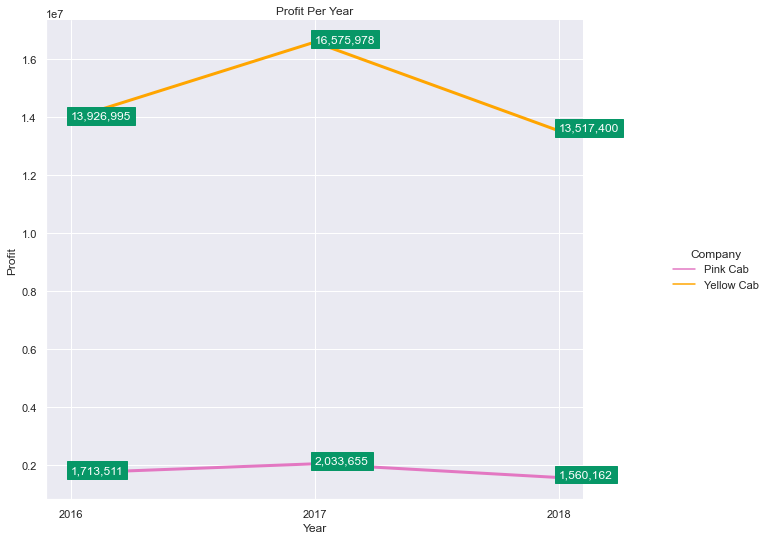

In [1117]:
temp_df = master_df.groupby(['company','year'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum', 'cost_of_trip':'sum','km_travelled':'sum'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost'})
temp_df['cost_per_km'] = temp_df['cost']/temp_df['km_travelled']
temp_df['average_km_per_ride'] = temp_df['km_travelled']/temp_df['nb_of_rides']
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

fig = sns.relplot(data=temp_df, 
                  x="year", y="profit", 
                  hue ='company', kind='line',
                  palette=palette, facet_kws={'legend_out': True},
                 linewidth = 3)
fig._legend.set_title('Company')
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit Per Year")
plt.gcf().set_size_inches(11.7, 8.27)

label_point(temp_df.year, temp_df.profit, temp_df.profit, plt.gca())  


We can see that during all three year, Yellow cab had greater profit than pink cab.
For both of the companies, 2017 was the most profitable year and after that there was a slight profit loss in 2018. Let's check what happend. Did they have lower number of rides, was the cost greater and price lower?

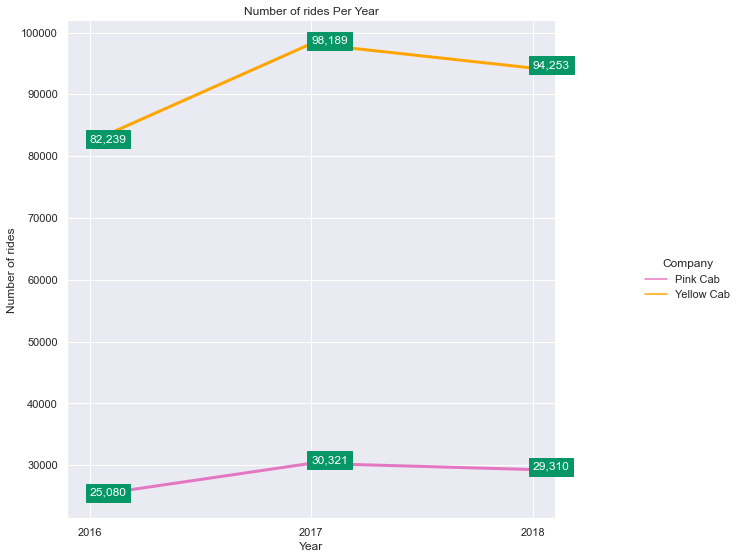

In [1118]:
fig = sns.relplot(data=temp_df, x="year", y="nb_of_rides", 
                  hue ='company', kind='line',palette=palette,
                  facet_kws={'legend_out': True}, linewidth = 3)

fig._legend.set_title('Company')
plt.xlabel("Year")
plt.ylabel("Number of rides")
plt.title("Number of rides Per Year")
plt.gcf().set_size_inches(11.7, 8.27)
label_point(temp_df.year, temp_df.nb_of_rides, temp_df.nb_of_rides, plt.gca())

In [1119]:
#I had a problem where division of two floats was int, so this in the cell below is how I fixed it
pd.options.display.float_format = None

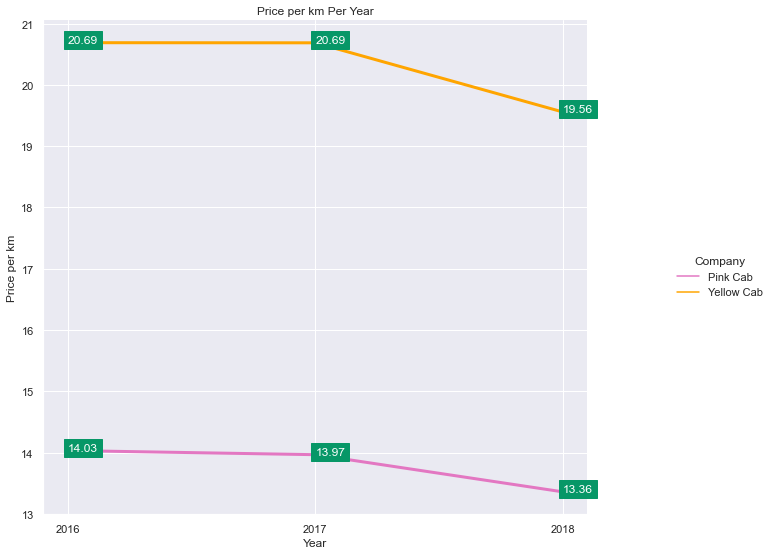

In [1120]:
fig = sns.relplot(data=temp_df, x="year", y="price_per_km", 
                  hue ='company', kind='line',
                  palette=palette, facet_kws={'legend_out': True}, linewidth = 3)
fig._legend.set_title('Company')
plt.xlabel("Year")
plt.ylabel("Price per km")
plt.title("Price per km Per Year")
plt.gcf().set_size_inches(11.7, 8.27)

label_point_full(temp_df.year, temp_df.price_per_km, temp_df.price_per_km, plt.gca())

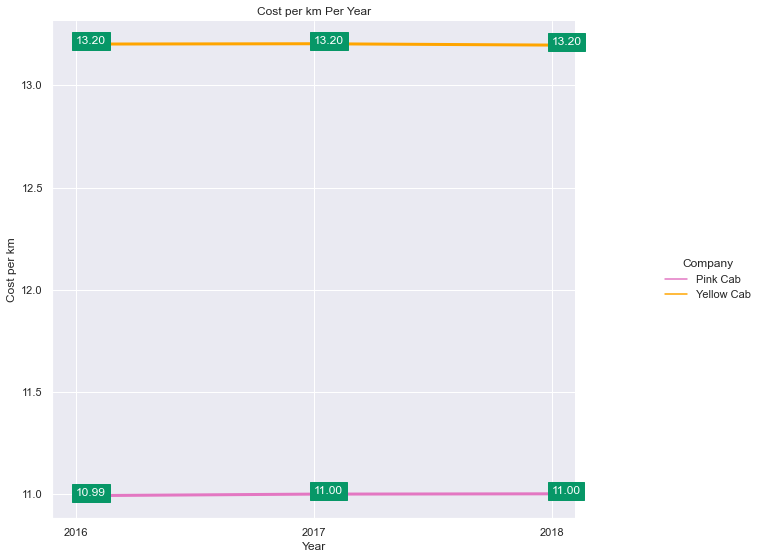

In [1121]:
fig = sns.relplot(data=temp_df, x="year", y="cost_per_km", 
                  hue ='company', kind='line',palette=palette,
                  facet_kws={'legend_out': True}, linewidth = 3)
fig._legend.set_title('Company')
plt.xlabel("Year")
plt.ylabel("Cost per km")
plt.title("Cost per km Per Year")
plt.gcf().set_size_inches(11.7, 8.27)
label_point_full(temp_df.year, temp_df.cost_per_km, temp_df.cost_per_km, plt.gca())

What we can conclude from the above graphs is that both companies had a slightly reduced number of rides in 2018 and both of them reduced their prices in 2018. Since the cost per km remained almost the same, this is what caused slight profit loss.

###################################################################################################
3. Is there any quarterly sesonality? (Profit per querter by year by company)


C:\Users\Marija\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Marija\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Marija\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Marija\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


Text(0.5, 1.0, 'Profit per quarter')

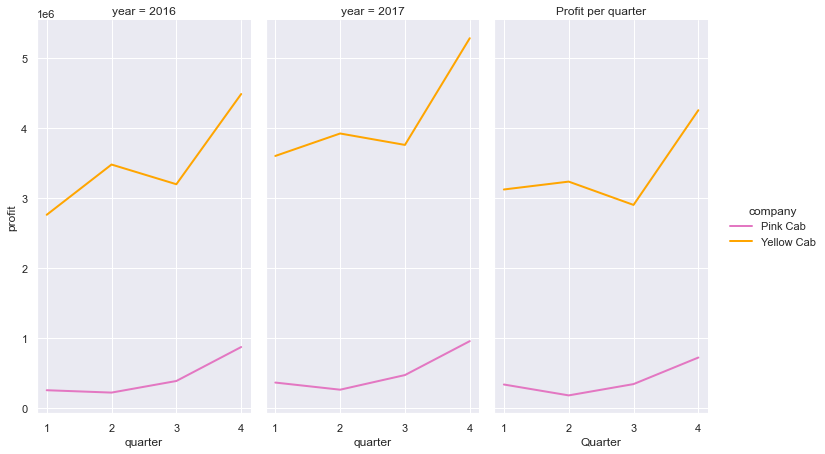

In [1122]:
temp_df = master_df.groupby(['company','year','quarter'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum', 'cost_of_trip':'sum','km_travelled':'sum'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost'})
temp_df['cost_per_km'] = temp_df['cost']/temp_df['km_travelled']
temp_df['average_km_per_ride'] = temp_df['km_travelled']/temp_df['nb_of_rides']
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

g = sns.FacetGrid(temp_df, col='year', hue='company',palette=palette)
g = g.map(sns.lineplot, 'quarter', 'profit',linewidth=2).add_legend()
plt.gcf().set_size_inches(11.7, 8.27)
fig._legend.set_title('Company')
plt.xlabel("Quarter")
plt.ylabel("Profit")
plt.title("Profit per quarter")

From the graphs above we can see that there is seasonality in the profit. There are seasonal differences between the companies ( For Yeloow cab Q2 is more profitable than Q1, for pink it's less profitable than Q1), but each of them has a quarterly seasonality.

###################################################################################################
4. Is profit significantly greater on some weekdays? (Profit per weekday by company)



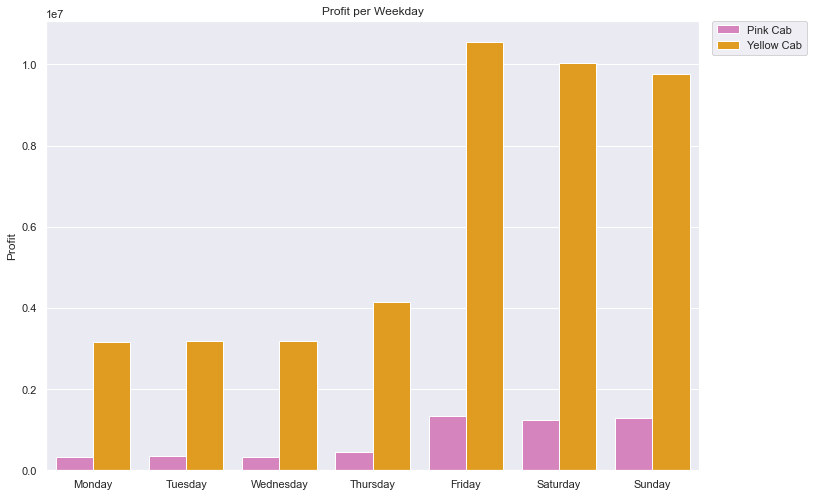

In [1123]:
temp_df = master_df.groupby(['company','weekday'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum', 'cost_of_trip':'sum','km_travelled':'sum'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost'})
temp_df['cost_per_km'] = temp_df['cost']/temp_df['km_travelled']
temp_df['average_km_per_ride'] = temp_df['km_travelled']/temp_df['nb_of_rides']
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

fig = sns.barplot(data=temp_df, x="weekday", y="profit", 
                  hue ='company',palette=palette,
                 order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#fig._legend.set_title('Company')
plt.xlabel("")
plt.ylabel("Profit")
plt.title("Profit per Weekday")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


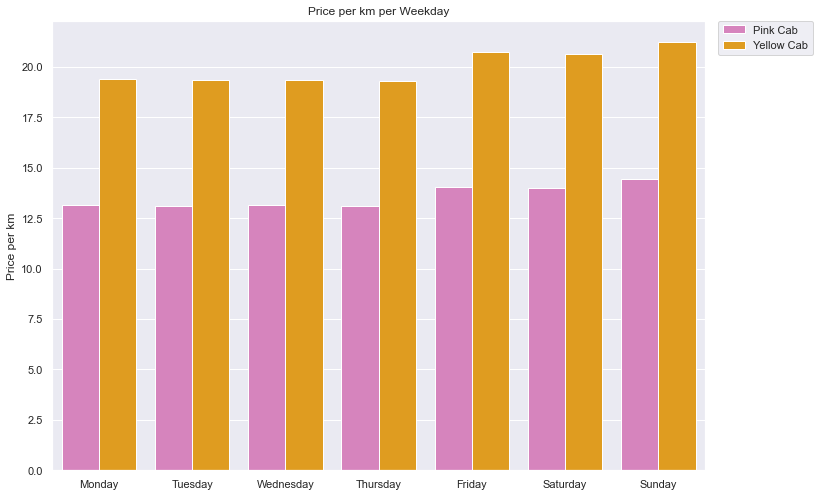

In [1124]:


fig = sns.barplot(data=temp_df, x="weekday", y="price_per_km", 
                  hue ='company',palette=palette,
                 order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#fig._legend.set_title('Company')
plt.xlabel("")
plt.ylabel("Price per km")
plt.title("Price per km per Weekday")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


We can see that both companies earn more on the weekends and for both of them friday is the most profitable day. We can also see that there is a big difference in the price. Even the most expensive day for Pink cab is much less expensive than the least expensive day of the yellow cab.

###################################################################################################

5. Is there a big price or cost difference per km between the companies? (Price/cost per km by company / by city)

I'll also include profit by city graph

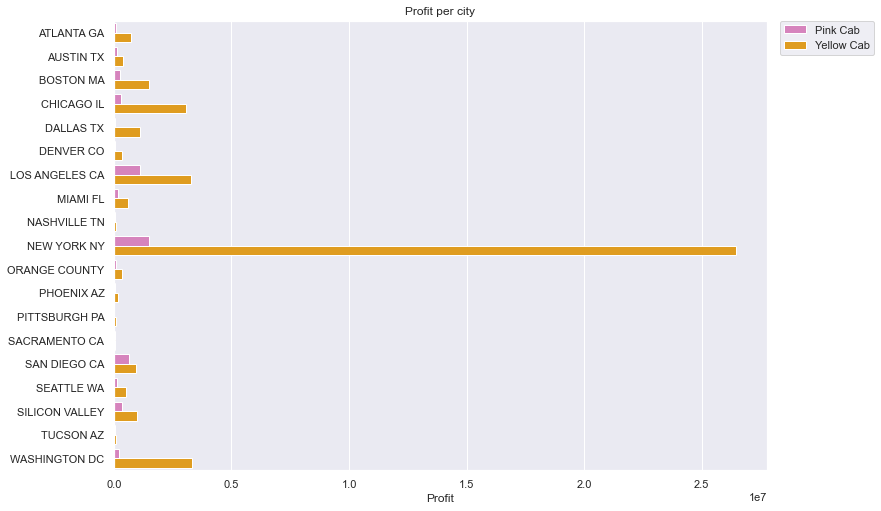

In [1142]:
temp_df = master_df.groupby(['company','city'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum', 'cost_of_trip':'sum','km_travelled':'sum'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost'})
temp_df['cost_per_km'] = temp_df['cost']/temp_df['km_travelled']
temp_df['average_km_per_ride'] = temp_df['km_travelled']/temp_df['nb_of_rides']
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

fig = sns.barplot(data=temp_df, y="city", x="profit", 
                  hue ='company',palette=palette,orient ='h')
#fig._legend.set_title('Company')
plt.xlabel("Profit")
plt.title("Profit per city")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Since there are so many cities, I'll make a table to extract most profitable company in each city.

In [1144]:
most_pr = temp_df.groupby('city', as_index=False).agg({'profit':max})
most_pr.merge(temp_df[['city','profit','company']], on =['city','profit'],how ='left')

,city,profit,company
0,ATLANTA GA,7.463828e+05,Yellow Cab
1,AUSTIN TX,3.792557e+05,Yellow Cab
2,BOSTON MA,1.506718e+06,Yellow Cab
3,CHICAGO IL,3.068591e+06,Yellow Cab
4,DALLAS TX,1.104003e+06,Yellow Cab
5,DENVER CO,3.570001e+05,Yellow Cab
6,LOS ANGELES CA,3.285977e+06,Yellow Cab
7,MIAMI FL,5.960001e+05,Yellow Cab
8,NASHVILLE TN,8.524768e+04,Yellow Cab
9,NEW YORK NY,2.645108e+07,Yellow Cab


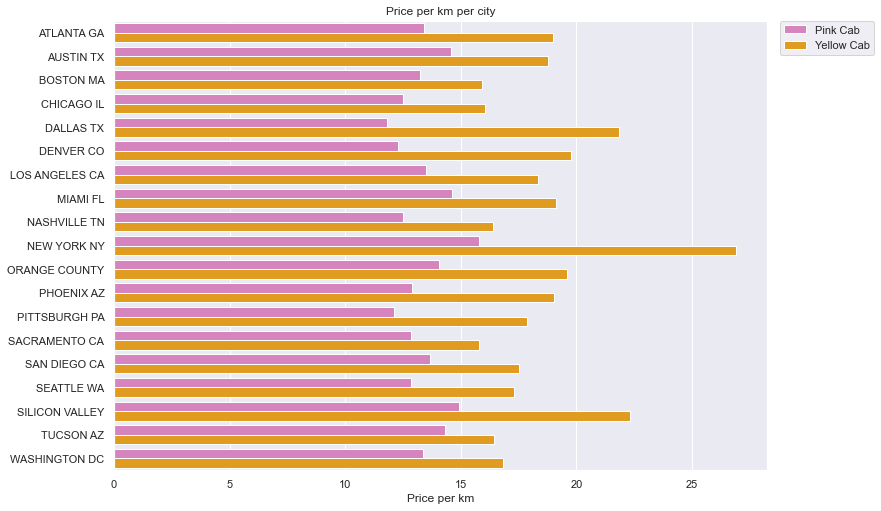

In [1145]:
fig = sns.barplot(data=temp_df, y="city", x="price_per_km", 
                  hue ='company',palette=palette,orient ='h')
#fig._legend.set_title('Company')
plt.xlabel("Price per km")
plt.title("Price per km per city")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

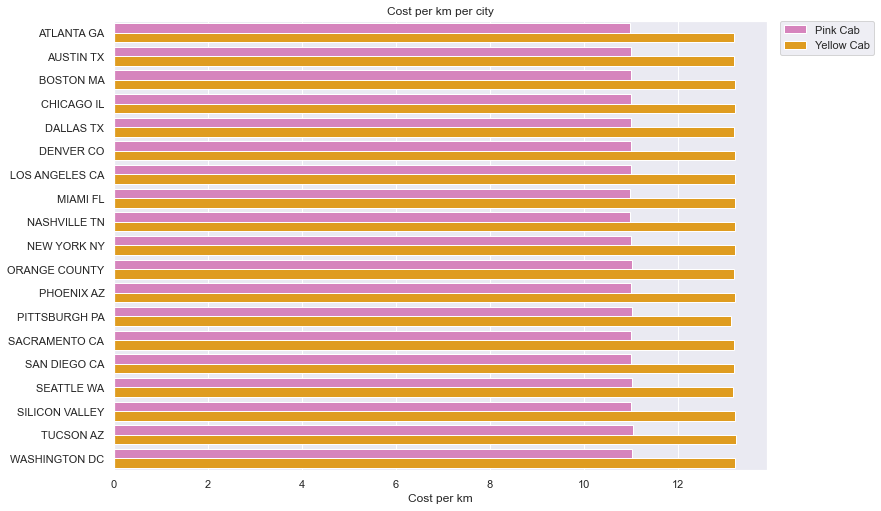

In [1146]:
fig = sns.barplot(data=temp_df, y="city", x="cost_per_km", 
                  hue ='company',palette=palette,orient ='h')
#fig._legend.set_title('Company')
plt.xlabel("Cost per km")
plt.title("Cost per km per city")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

I'll also need number of rides graph to conclude something

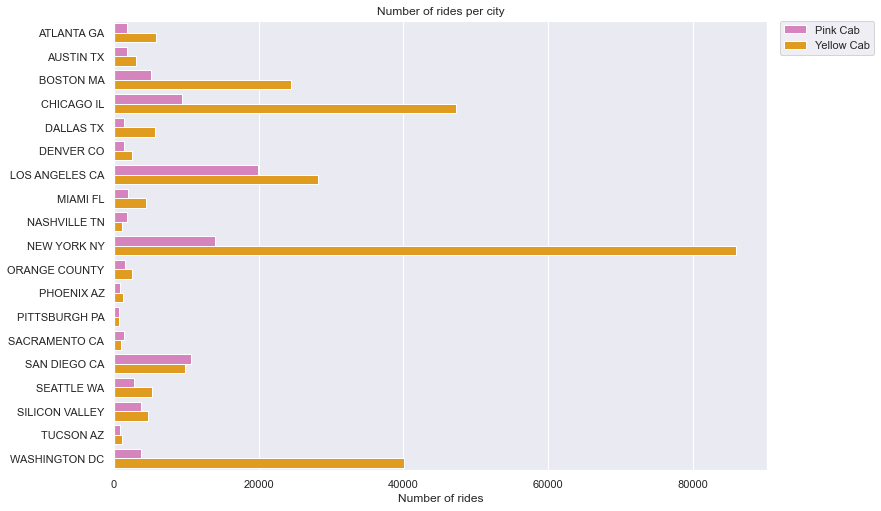

In [1147]:
fig = sns.barplot(data=temp_df, y="city", x="nb_of_rides", 
                  hue ='company',palette=palette,orient ='h')
#fig._legend.set_title('Company')
plt.xlabel("Number of rides")
plt.title("Number of rides per city")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

From the graphs from above we can see that New York is extremelly profitable city and Yellow cab dominates sooo much. The price in that city is the highest and it has more than double number of rides than all other cities.

Also, there is a cost difference between the companies, but we can say that it is almost a constant value. 
On the other hand, the prices are different and Yellow cab is more expensive than pink cab in every city.

In [1149]:
most_nb_of_rides = temp_df.groupby('city', as_index=False).agg({'nb_of_rides':max})
most_nb_of_rides.merge(temp_df[['city','nb_of_rides','company']], on =['city','nb_of_rides'],how ='left')

,city,nb_of_rides,company
0,ATLANTA GA,5795,Yellow Cab
1,AUSTIN TX,3028,Yellow Cab
2,BOSTON MA,24506,Yellow Cab
3,CHICAGO IL,47264,Yellow Cab
4,DALLAS TX,5637,Yellow Cab
5,DENVER CO,2431,Yellow Cab
6,LOS ANGELES CA,28168,Yellow Cab
7,MIAMI FL,4452,Yellow Cab
8,NASHVILLE TN,1841,Pink Cab
9,NEW YORK NY,85918,Yellow Cab


Also, there are 4 cities where pink cab has greater number of rides than the yellow cab, but even in those cities Yellow cab gains more profit than the pink cab.

###################################################################################################
6. Does one company have more customers than the other ? (#customers by company by city/age group/gender)


I'm gonna check unique number of customers and number of rides separately

Text(441.2761287326389, 0.5, '')

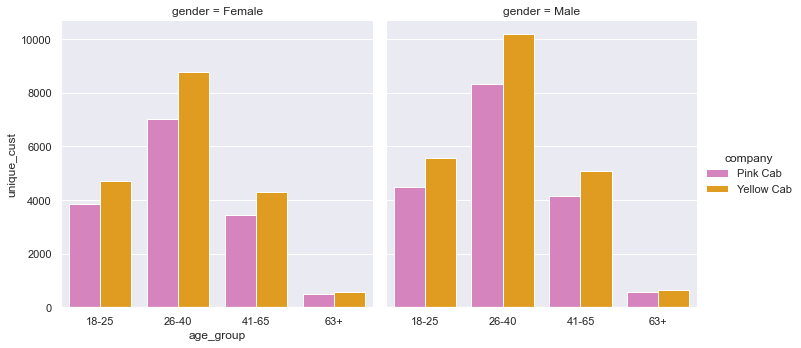

In [1170]:
temp_df = master_df.groupby(['company','age_group','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', y='unique_cust', col='gender',x = 'age_group',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("")

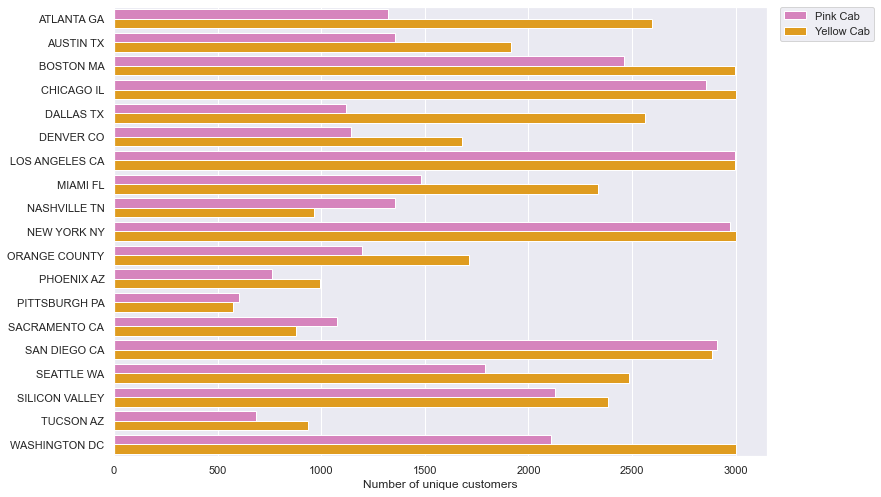

In [1173]:
temp_df = master_df.groupby(['company','city'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


fig = sns.barplot(data=temp_df, y="city", x="unique_cust", 
                  hue ='company',palette=palette,orient ='h')
#fig._legend.set_title('Company')
plt.xlabel("Number of unique customers")
#plt.title("Number of rides per city")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Companies have similar distribution of male/female customers and the age group vustomer percentages are similar. 
There are cities where there Pink company has more individulas driving with them, but we already saw the the numer of rides of Yellow cab customers is much higher.

###################################################################################################
7. Percentage of users in every city? (%users by company by city)

In [1181]:
temp_df = master_df.groupby(['company','city'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique','users':'max'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['% users'] = temp_df['unique_cust'] / temp_df['users']*100

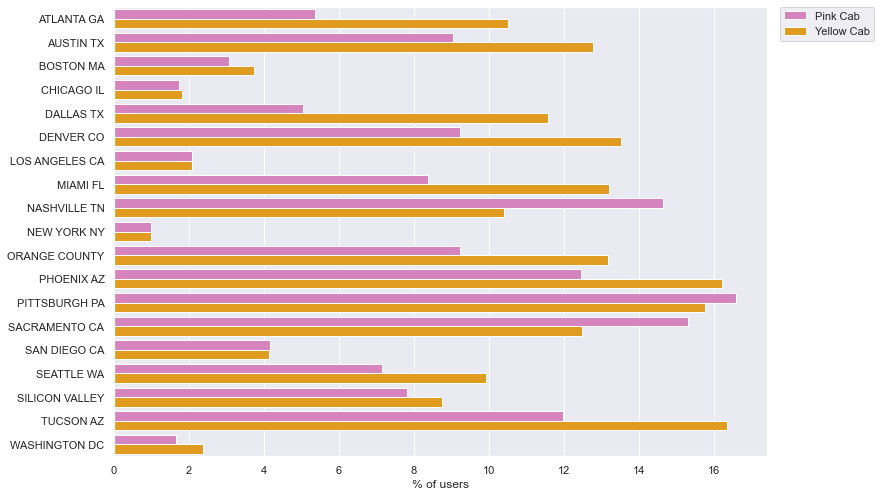

In [1183]:
fig = sns.barplot(data=temp_df, y="city", x='% users', 
                  hue ='company',palette=palette,orient ='h')
#fig._legend.set_title('Company')
plt.xlabel("% of users")
#plt.title("Number of rides per city")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

It's really interesting to see this graph. It says that %users who use each cab service is similar. We already know that there is big difference in number of rides which results in profit differences. This might be because Yellow cab users take taxi more than Pink cab users?

###################################################################################################
8. Is one cab company more popular among some age groups or gender? 

We already saw a graph of unique customers by company /age group/ gender. The distribution looks almost equal. Each company has preferences in both genders and all age groups and those preferences are proportional between the companies

###################################################################################################
9. Do people of certaing gender prefer one company over another? (#rides by company by gender)

Text(40.64763993055557, 0.5, '')

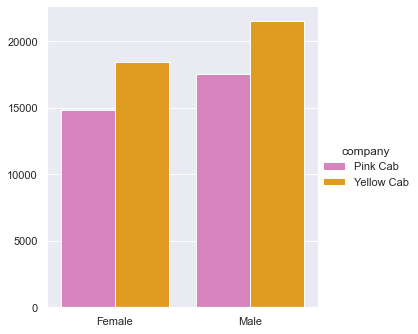

In [1185]:
temp_df = master_df.groupby(['company','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', y='unique_cust', x='gender',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("")

Text(42.23080833333334, 0.5, '')

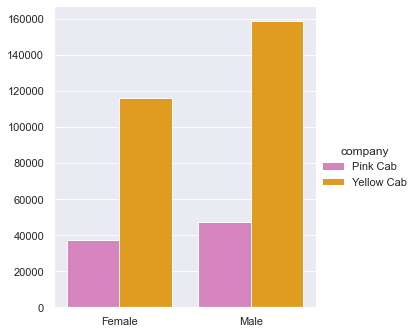

In [1186]:
temp_df = master_df.groupby(['company','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', y='nb_of_rides', x='gender',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("")

The gender distribution looks good and Yellow company doesn't have much more female/male users than pink company, but those users make more rides.

###################################################################################################
10. Does one company have more users overall? (#customers by company)

We already saw at the beginning of the analysis that Yellow cab has more customers (not much mroe, but mroe), but those customers take rides more ofter thna the Pink Cab customers

###################################################################################################
12. Does one company have more rides than another? (#rides by company by city)


Yes, we already saw the answer to this. Yellow cab has much more rides than Pink Cab

###################################################################################################

13. Does that above ration changes when its holiday? (#rides by holiday by gender)

Text(40.680487152777786, 0.5, 'Numer of unique customers')

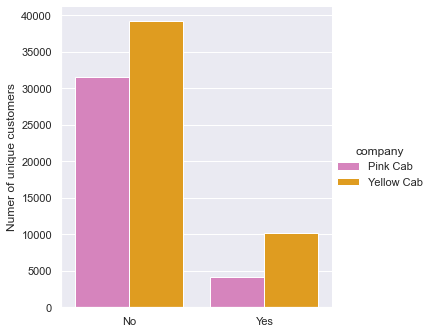

In [1192]:
temp_df = master_df.groupby(['company','is_holiday'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', y='unique_cust', x='is_holiday',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Numer of unique customers")

Text(42.19796111111113, 0.5, 'Number of rides')

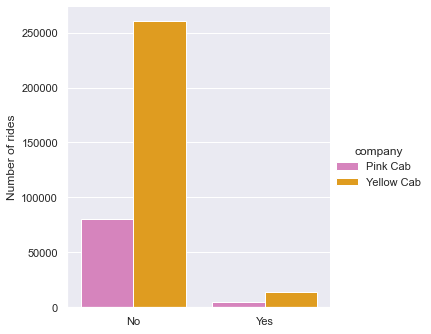

In [1190]:
temp_df = master_df.groupby(['company','is_holiday'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', y='nb_of_rides', x='is_holiday',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

Text(444.7852020833334, 0.5, 'Number of rides')

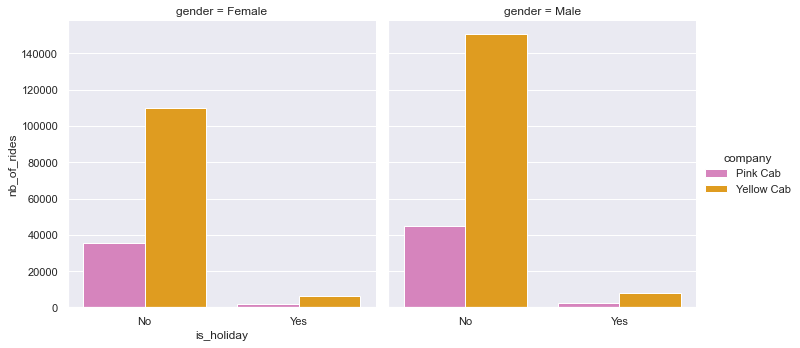

In [1193]:
temp_df = master_df.groupby(['company','is_holiday','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', col='gender',y='nb_of_rides', x='is_holiday',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

Nothing new to onclude here

###################################################################################################
14. For users who have more than x rides in both companies, which one do they actually prefer? (#users with 10 rides by company)

Text(441.2496118055557, 0.5, 'Number of rides')

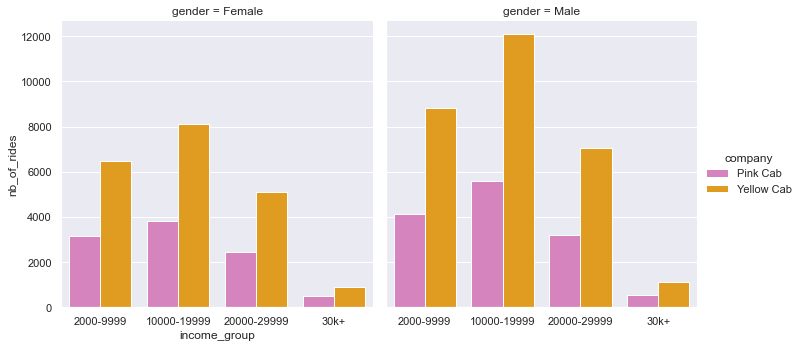

In [1263]:
cust_info = master_df.groupby(['customer_id','company'], as_index=False).agg({'transaction_id':'count'})
cust_info_pivot = cust_info.pivot(index = 'customer_id', columns ='company', values ='transaction_id').reset_index()
cust_ids = cust_info_pivot[(cust_info_pivot['Pink Cab']>5) & (cust_info_pivot['Yellow Cab']>5)]['customer_id']
temp_df =master_df.merge(cust_ids,on ='customer_id',how='inner')

temp_df = temp_df.groupby(['company','income_group','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

sns.catplot(data = temp_df, hue='company', col='gender',
            y='nb_of_rides', x='income_group',kind='bar',
            palette = palette,facet_kws={'legend_out': True},
           order = ['2000-9999','10000-19999','20000-29999','30k+'])

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

Text(434.39056666666676, 0.5, 'Number of rides')

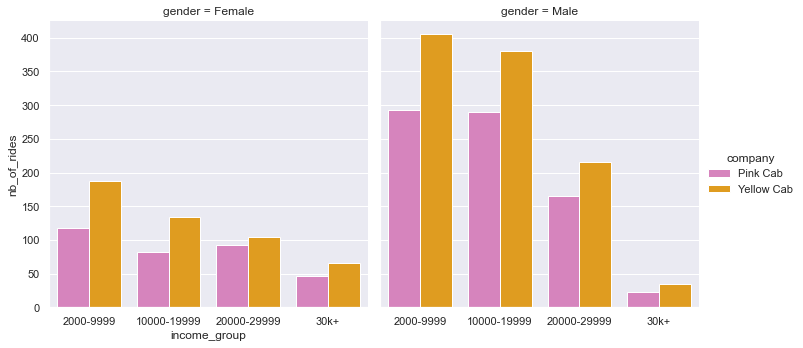

In [1264]:
cust_info = master_df.groupby(['customer_id','company'], as_index=False).agg({'transaction_id':'count'})
cust_info_pivot = cust_info.pivot(index = 'customer_id', columns ='company', values ='transaction_id').reset_index()
cust_ids = cust_info_pivot[(cust_info_pivot['Pink Cab']>10) & (cust_info_pivot['Yellow Cab']>10)]['customer_id']
temp_df =master_df.merge(cust_ids,on ='customer_id',how='inner')

temp_df = temp_df.groupby(['company','income_group','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

sns.catplot(data = temp_df, hue='company', col='gender',
            y='nb_of_rides', x='income_group',kind='bar',
            palette = palette,facet_kws={'legend_out': True},
           order = ['2000-9999','10000-19999','20000-29999','30k+'])

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

Text(441.3203236111112, 0.5, 'Number of rides')

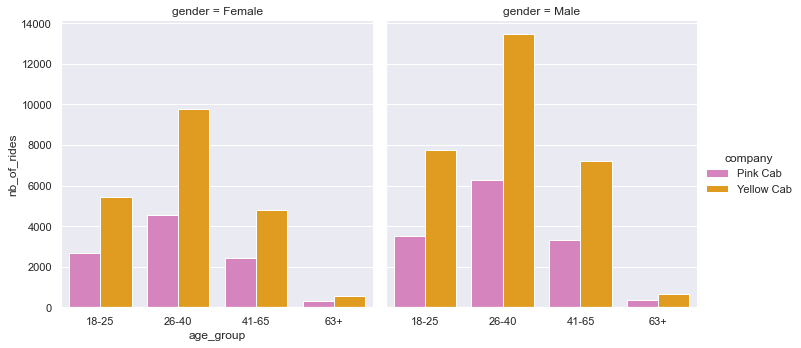

In [1265]:
cust_info = master_df.groupby(['customer_id','company'], as_index=False).agg({'transaction_id':'count'})
cust_info_pivot = cust_info.pivot(index = 'customer_id', columns ='company', values ='transaction_id').reset_index()
cust_ids = cust_info_pivot[(cust_info_pivot['Pink Cab']>5) & (cust_info_pivot['Yellow Cab']>5)]['customer_id']
temp_df =master_df.merge(cust_ids,on ='customer_id',how='inner')


temp_df = temp_df.groupby(['company','age_group','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

sns.catplot(data = temp_df, hue='company', col='gender',
            y='nb_of_rides', x='age_group',kind='bar',
            palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

Text(434.39056666666676, 0.5, 'Number of rides')

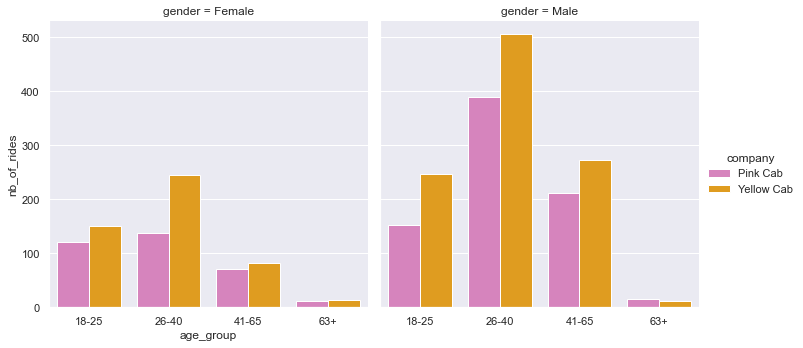

In [1266]:
cust_info = master_df.groupby(['customer_id','company'], as_index=False).agg({'transaction_id':'count'})
cust_info_pivot = cust_info.pivot(index = 'customer_id', columns ='company', values ='transaction_id').reset_index()
cust_ids = cust_info_pivot[(cust_info_pivot['Pink Cab']>10) & (cust_info_pivot['Yellow Cab']>10)]['customer_id']
temp_df =master_df.merge(cust_ids,on ='customer_id',how='inner')

temp_df = temp_df.groupby(['company','age_group','gender'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']

sns.catplot(data = temp_df, hue='company', col='gender',
            y='nb_of_rides', x='age_group',kind='bar',
            palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

People who have driven more than 5 time: mostly men, 26-40, income 10k-20k
Prople who have driven more than 10 times: mostly men, 26-40, 2k-20k

In [1277]:
cust_info = master_df.groupby(['customer_id','company'], as_index=False).agg({'transaction_id':'count'})
cust_info_pivot = cust_info.pivot(index = 'customer_id', columns ='company', values ='transaction_id').reset_index()
cust_info_pivot[cust_info_pivot['Pink Cab']<cust_info_pivot['Yellow Cab']].shape[0]

17464

In [1278]:
cust_info_pivot[cust_info_pivot['Pink Cab']>cust_info_pivot['Yellow Cab']].shape[0]

3633

There are around 20000 people who have driven with both companies at least once. Only around 3000 of them have used Pink cab more than Yellow cab.

###################################################################################################

15. Do people with certain income group prefer one company over another? (#custoemrs/profit by company by income group)

Text(803.4040433256172, 0.5, 'Number of rides')

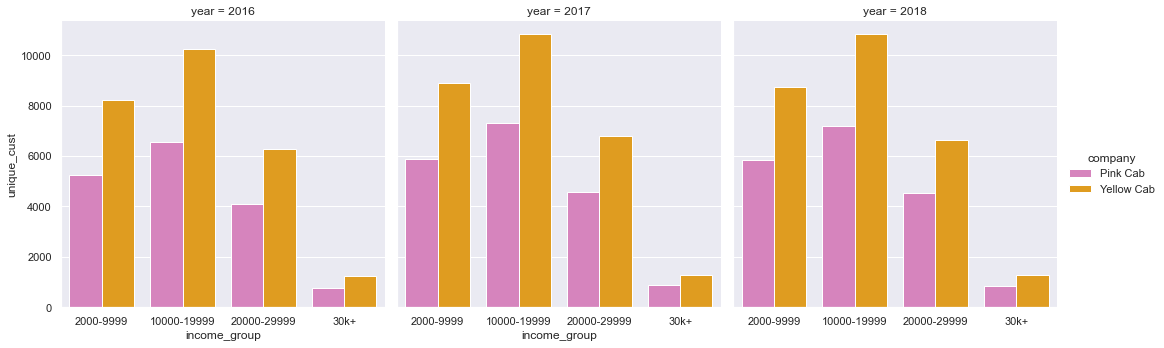

In [1281]:
temp_df = master_df.groupby(['company','income_group','year'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', col='year',y='unique_cust',
            x='income_group',kind='bar',palette = palette,facet_kws={'legend_out': True},
           order = ['2000-9999','10000-19999','20000-29999','30k+'])

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
plt.ylabel("Number of rides")

No, customers from all income groups are using both cab companies

###################################################################################################
16. Is there significant difference of profit by payment mode? (profit by payment mode by company by gender)

Text(0.5, 23.006875000000008, '')

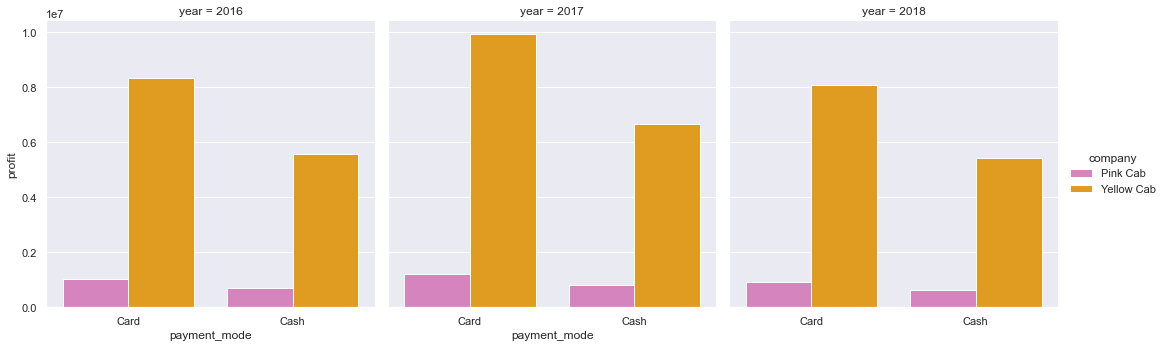

In [1284]:
temp_df = master_df.groupby(['company','payment_mode','year'], as_index=False)\
.agg({'profit':'sum','transaction_id':'count','price_charged': 'sum',
      'cost_of_trip':'sum','km_travelled':'sum','customer_id':'nunique'})\
.rename(columns={'transaction_id':'nb_of_rides','cost_of_trip':'cost','customer_id':'unique_cust'})
temp_df['profit_per_km'] = temp_df['profit']/temp_df['km_travelled']
temp_df['price_per_km'] = temp_df['price_charged']/temp_df['km_travelled']


sns.catplot(data = temp_df, hue='company', col='year',y='profit',
            x='payment_mode',kind='bar',palette = palette,facet_kws={'legend_out': True})

#fig._legend.set_title('Company')
plt.xlabel("")
#plt.title("Number of unique customers")
#plt.ylabel("Number of rides")

For the both companies we can see that people prefer the card a bit, but since both options are included, there is no preference of one company by another because of payment mode

###################################################################################################

17. Does one company have more rides per day than another? 

Already answered and the answer is yes

###################################################################################################
###################################################################################################

Recomendation results:


Profit: Yellow cab gains more than 8 times bigger profit than the pink cab. It gains bigger profit among all age groups, income groups, cities and genders.

Price per km: In all of the 19 cities Yellow cab has up to 60% bigger price per km than the Pink cab. It is more expensive than the pink cab in every city.

Number of drives: Out of 19 cities, Yellow cab has greater number of rides in 15 of them and all together has more than  3 times higher number of rides. Pink cab has greater number of rides than Yellow cab in 4 of the cities. 

Customers: Both companies have almost equal number of customers among all genders, income groups and age groups. Even though Pink cab has greater number of unique customers in some cities, the number of drives those customers take is drastically lower than for the yellow cab.

Customers who use both companies:  There are around 20000 people who have driven with both companies at least once. Only around 3000 of them have used Pink cab more than Yellow cab.


The investment recommendation goes to the Yellow cab company